In [1]:
from model import atp_graph, losses
from data_wrangler import synthetic_data_gen, feature_extractor
import keras
import numpy as np
import pandas as pd
import tensorflow as tf
from model import atp_pipeline
from comparison_models.tnp import tnp_pipeline
from data_wrangler import dataset_preparer
import argparse
from data_wrangler.batcher import batcher, batcher_np
import os
import matplotlib.pyplot as plt
import numpy as np

2023-05-09 15:13:00.155460: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
dataset = "exchange"
model = "atp"
iterations = 300
num_repeats = 1
n_C = 96
n_T = 336

In [3]:


if dataset == "exchange":
    x_train, y_train, x_val, y_val, x_test, y_test = dataset_preparer.dataset_processor(path_to_data="datasets/exchange.csv") 
    save_dir = "weights/forecasting/exchange"
    print('make sure to create the exchange folder in weights/forecasting/')
else: 
    raise ValueError("Dataset not found")
    
save_dir = save_dir + "/" + model

    
batch_size = 32
test_batch_s = 100

nll_list = []
mse_list = []




   



make sure to create the exchange folder in weights/forecasting/


In [4]:
save_dir = "weights/dummy"

In [18]:
x_train, y_train, x_val, y_val, x_test, y_test,_ = dataset_preparer.gp_data_processor(path_to_data_folder="datasets/rbf/") 


# TNP


In [5]:
i = 0
step = 1
run= 50 + i
tf.random.set_seed(run)


In [7]:

model = tnp_pipeline.tnp_pipeline(num_heads=6,projection_shape_for_head=8,output_shape=48, dropout_rate=0.1, 
                 permutation_repeats=0,bound_std=False, num_layers=6,target_y_dim=1)

2023-05-08 11:26:34.031420: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-05-08 11:26:34.772603: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1613] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 7395 MB memory:  -> device: 0, name: Quadro P4000, pci bus id: 0000:3b:00.0, compute capability: 6.1


Model 1

model = tnp_pipeline.tnp_pipeline(num_heads=6,projection_shape_for_head=16,output_shape=32, dropout_rate=0.0, 
                 permutation_repeats=1,bound_std=False, num_layers=6,target_y_dim=1)
                 
Best val score:  0.12        

Model 2 

model = tnp_pipeline.tnp_pipeline(num_heads=6,projection_shape_for_head=16,output_shape=32, dropout_rate=0.2, 
                 permutation_repeats=1,bound_std=False, num_layers=6,target_y_dim=1)
                 
Best val score: 0.11



Modle 4
model = tnp_pipeline.tnp_pipeline(num_heads=6,projection_shape_for_head=8,output_shape=48, dropout_rate=0.05, 
                 permutation_repeats=1,bound_std=False, num_layers=6,target_y_dim=1)
     
     
0.099




Model 7


model = tnp_pipeline.tnp_pipeline(num_heads=6,projection_shape_for_head=12,output_shape=16, dropout_rate=0.1, 
                 permutation_repeats=1,bound_std=False, num_layers=6,target_y_dim=1)
                 
                 
0.22            

Model 8

model = tnp_pipeline.tnp_pipeline(num_heads=6,projection_shape_for_head=12,output_shape=16, dropout_rate=0.25, 
                 permutation_repeats=1,bound_std=False, num_layers=6,target_y_dim=1)
                 
0.04    

Model 9 

model = tnp_pipeline.tnp_pipeline(num_heads=6,projection_shape_for_head=8,output_shape=48, dropout_rate=0.05, 
                 permutation_repeats=0,bound_std=False, num_layers=6,target_y_dim=1)


-0.6

Model 10 


model = tnp_pipeline.tnp_pipeline(num_heads=6,projection_shape_for_head=12,output_shape=16, dropout_rate=0.15, 
                 permutation_repeats=0,bound_std=False, num_layers=6,target_y_dim=1)
                 
Use model 9

In [22]:
n_T = 720

In [23]:
array = []
train_array = []

In [27]:
idx_list = list(range(x_train.shape[0] - (n_C+n_T)))
x,y,_ = batcher(x_train,y_train,idx_list,window=n_C+n_T,batch_s=32)

In [28]:
μ, log_σ = model([x, y, n_C, n_T, False])


2023-05-08 11:29:38.109328: W tensorflow/tsl/framework/bfc_allocator.cc:479] Allocator (GPU_0_bfc) ran out of memory trying to allocate 1.69GiB (rounded to 1811939328)requested by op Softmax
If the cause is memory fragmentation maybe the environment variable 'TF_GPU_ALLOCATOR=cuda_malloc_async' will improve the situation. 
Current allocation summary follows.
Current allocation summary follows.
2023-05-08 11:29:38.109388: I tensorflow/tsl/framework/bfc_allocator.cc:1034] BFCAllocator dump for GPU_0_bfc
2023-05-08 11:29:38.109420: I tensorflow/tsl/framework/bfc_allocator.cc:1041] Bin (256): 	Total Chunks: 81, Chunks in use: 81. 20.2KiB allocated for chunks. 20.2KiB in use in bin. 12.2KiB client-requested in use in bin.
2023-05-08 11:29:38.109444: I tensorflow/tsl/framework/bfc_allocator.cc:1041] Bin (512): 	Total Chunks: 2, Chunks in use: 2. 1.0KiB allocated for chunks. 1.0KiB in use in bin. 768B client-requested in use in bin.
2023-05-08 11:29:38.109468: I tensorflow/tsl/framework/bfc_a

ResourceExhaustedError: Exception encountered when calling layer 'dot_product_attention' (type DotProductAttention).

{{function_node __wrapped__Softmax_device_/job:localhost/replica:0/task:0/device:GPU:0}} OOM when allocating tensor with shape[32,6,1536,1536] and type float on /job:localhost/replica:0/task:0/device:GPU:0 by allocator GPU_0_bfc [Op:Softmax]

Call arguments received by layer 'dot_product_attention' (type DotProductAttention):
  • queries=tf.Tensor(shape=(32, 6, 1536, 8), dtype=float32)
  • keys=tf.Tensor(shape=(32, 6, 1536, 8), dtype=float32)
  • values=tf.Tensor(shape=(32, 6, 1536, 8), dtype=float32)
  • d_k=48
  • mask=tf.Tensor(shape=(1536, 1536), dtype=bool)

In [26]:
μ.shape

TensorShape([16, 720, 1])

In [44]:
model.summary()

Model: "tnp_pipeline"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 feature_wrapper_2 (feature_  multiple                 0 (unused)
 wrapper)                                                        
                                                                 
 tnp__decoder (TNP_Decoder)  multiple                  95474     
                                                                 
Total params: 95,474
Trainable params: 95,474
Non-trainable params: 0
_________________________________________________________________


In [45]:

    run = 54
    tr_step = atp_graph.build_graph()

    ###### can we put the name of the model into the folder name #########?

    name_comp = 'run_' + str(run)
    folder = save_dir + '/ckpt/check_' + name_comp
    if not os.path.exists(folder): os.mkdir(folder)
    opt = tf.keras.optimizers.Adam(3e-4)
    ckpt = tf.train.Checkpoint(step=tf.Variable(1), optimizer=opt, net=model)
    manager = tf.train.CheckpointManager(ckpt, folder, max_to_keep=1)
    ckpt.restore(manager.latest_checkpoint) 
    sum_mse_tot = 0; sum_nll_tot = 0
    mini = 50000

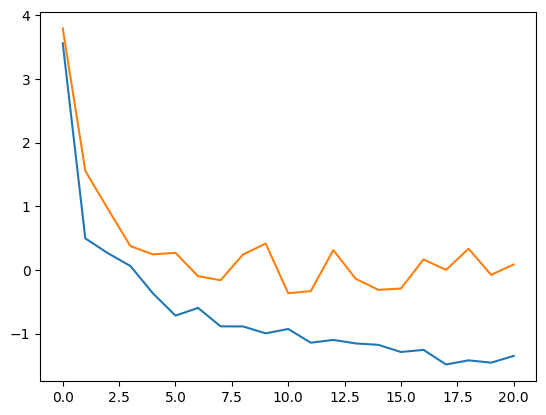

Tensor("atp_pipeline/cond/argsort/TopKV2:1", shape=(1, None), dtype=int32)
Tensor("Const_2:0", shape=(), dtype=bool)
Tensor("atp_pipeline/cond/argsort/TopKV2:1", shape=(1, None), dtype=int32)
Tensor("Const_2:0", shape=(), dtype=bool)


2023-05-04 21:16:47.803052: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2023-05-04 21:16:47.803759: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-05-04 21:16:47.936262: W tensorflow/core/grappler/optimizers/loop_optimizer.cc:907] Skipping loop optimization for Merge node with control input: atp_pipeline/cond/branch_executed/_11


tf.Tensor(False, shape=(), dtype=bool)


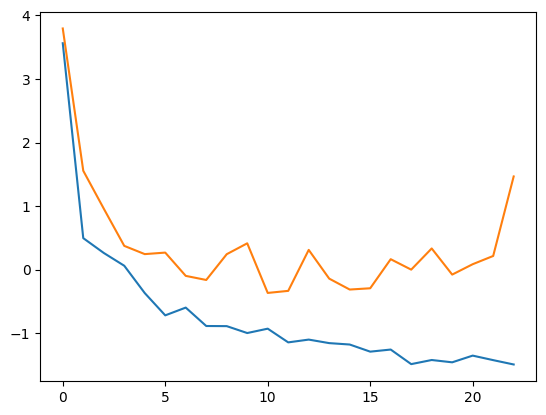

tf.Tensor(1.4680268, shape=(), dtype=float32)
tf.Tensor(-0.36275202, shape=(), dtype=float32)


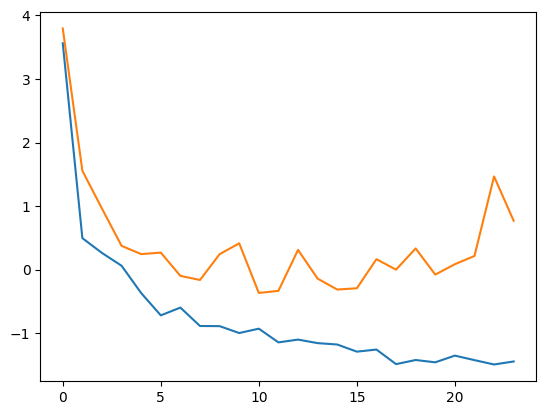

tf.Tensor(0.7708572, shape=(), dtype=float32)
tf.Tensor(-0.36275202, shape=(), dtype=float32)


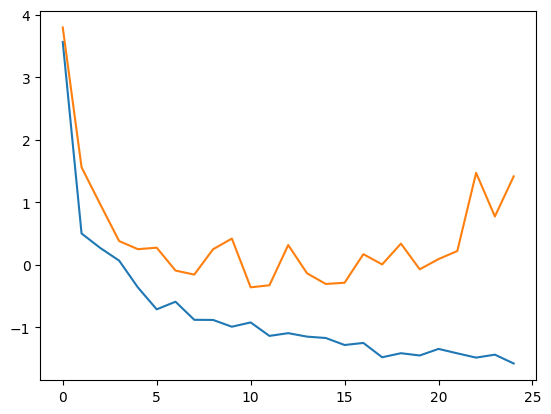

tf.Tensor(1.4119834, shape=(), dtype=float32)
tf.Tensor(-0.36275202, shape=(), dtype=float32)


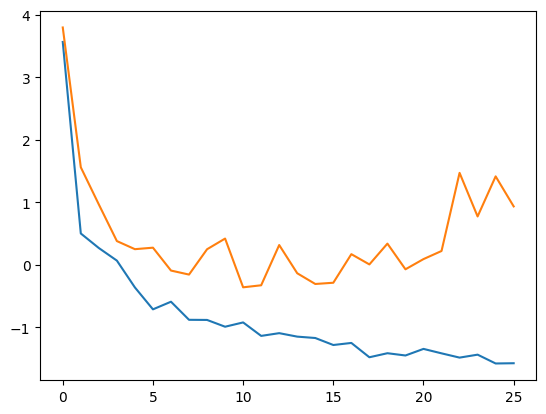

tf.Tensor(0.93151265, shape=(), dtype=float32)
tf.Tensor(-0.36275202, shape=(), dtype=float32)


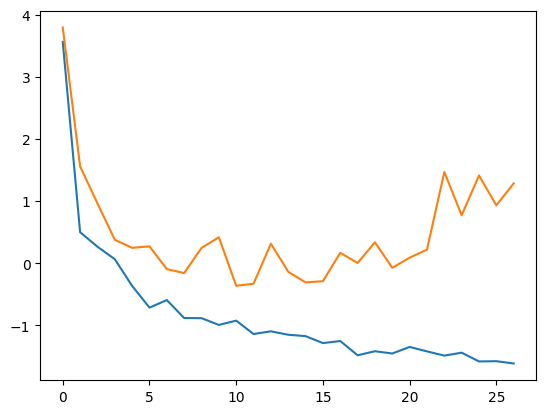

tf.Tensor(1.2841022, shape=(), dtype=float32)
tf.Tensor(-0.36275202, shape=(), dtype=float32)


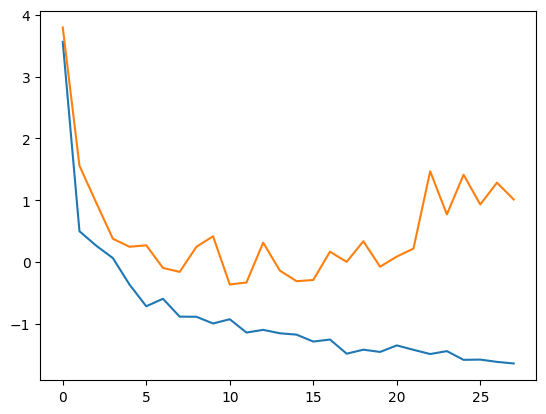

tf.Tensor(1.0128156, shape=(), dtype=float32)
tf.Tensor(-0.36275202, shape=(), dtype=float32)


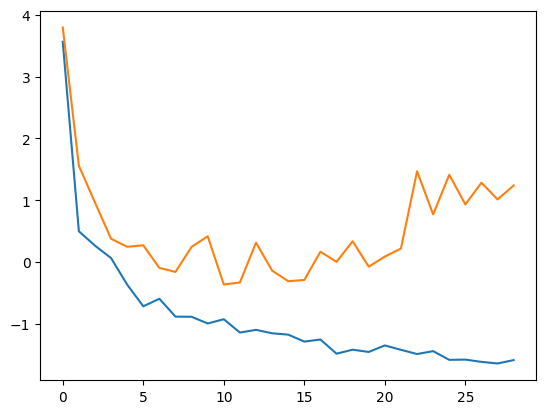

tf.Tensor(1.2390145, shape=(), dtype=float32)
tf.Tensor(-0.36275202, shape=(), dtype=float32)


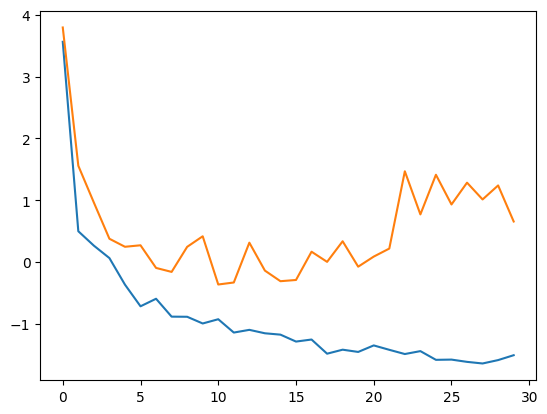

tf.Tensor(0.6561611, shape=(), dtype=float32)
tf.Tensor(-0.36275202, shape=(), dtype=float32)


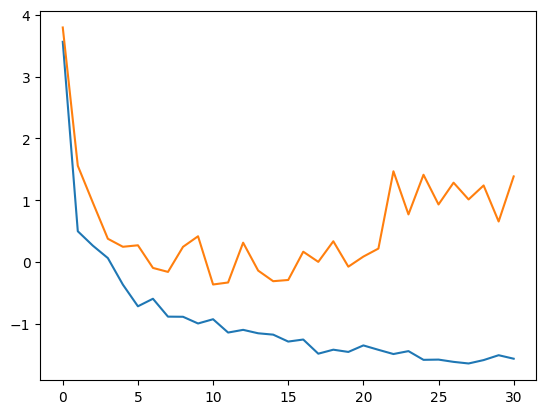

tf.Tensor(1.3852177, shape=(), dtype=float32)
tf.Tensor(-0.36275202, shape=(), dtype=float32)


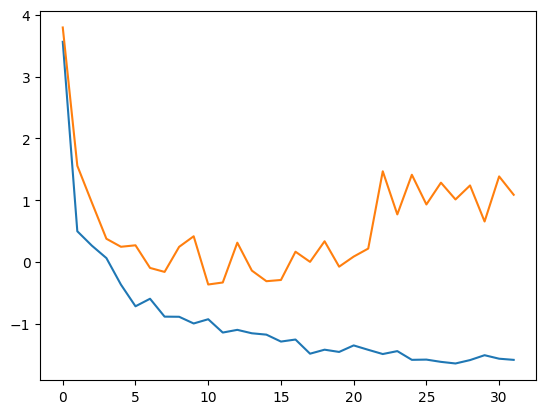

tf.Tensor(1.0883057, shape=(), dtype=float32)
tf.Tensor(-0.36275202, shape=(), dtype=float32)


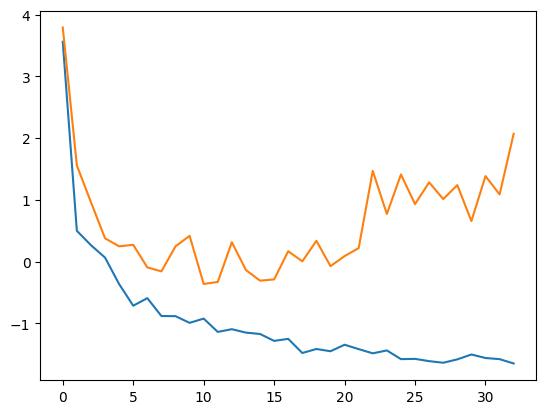

tf.Tensor(2.0709975, shape=(), dtype=float32)
tf.Tensor(-0.36275202, shape=(), dtype=float32)


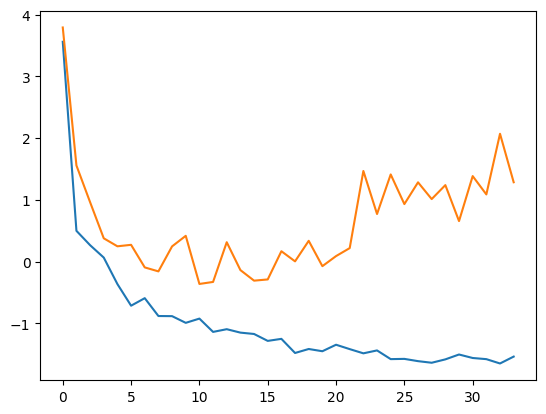

tf.Tensor(1.2854741, shape=(), dtype=float32)
tf.Tensor(-0.36275202, shape=(), dtype=float32)


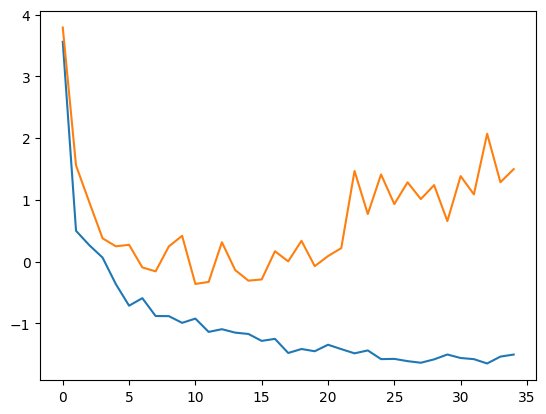

tf.Tensor(1.4980048, shape=(), dtype=float32)
tf.Tensor(-0.36275202, shape=(), dtype=float32)


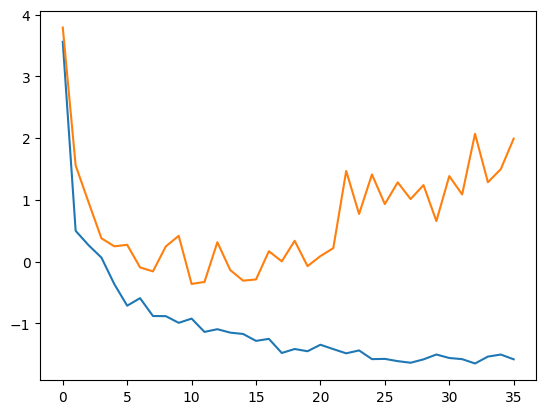

tf.Tensor(1.9922172, shape=(), dtype=float32)
tf.Tensor(-0.36275202, shape=(), dtype=float32)


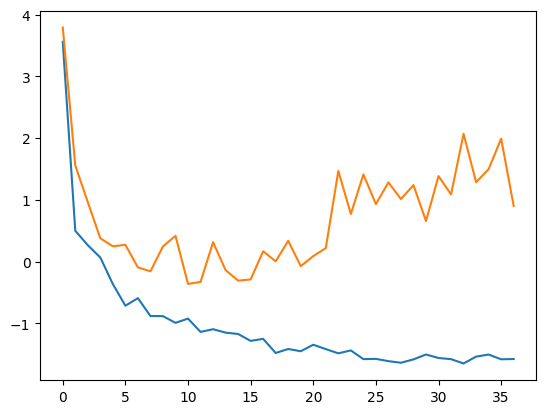

tf.Tensor(0.90089965, shape=(), dtype=float32)
tf.Tensor(-0.36275202, shape=(), dtype=float32)


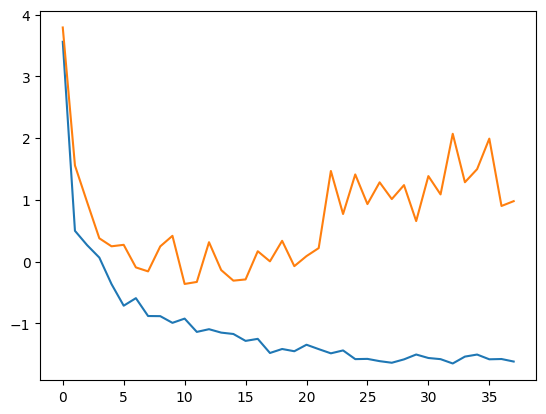

tf.Tensor(0.97901124, shape=(), dtype=float32)
tf.Tensor(-0.36275202, shape=(), dtype=float32)


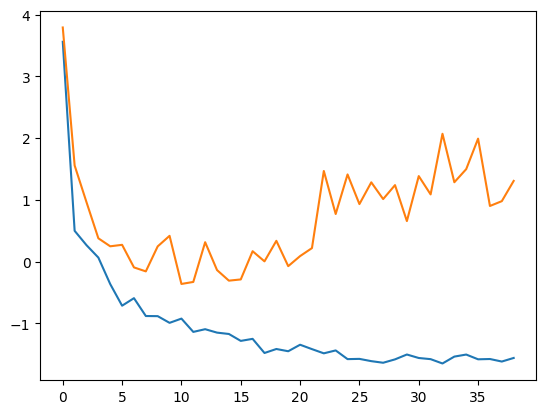

tf.Tensor(1.3072135, shape=(), dtype=float32)
tf.Tensor(-0.36275202, shape=(), dtype=float32)


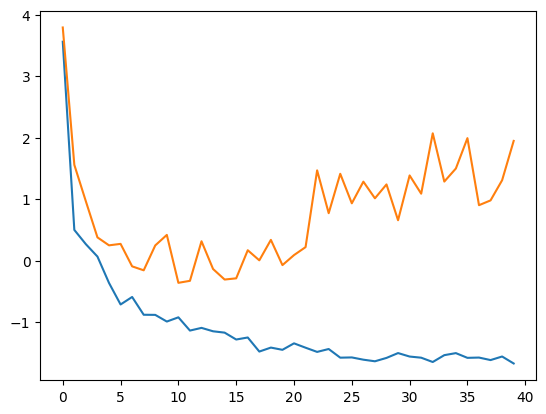

tf.Tensor(1.9471456, shape=(), dtype=float32)
tf.Tensor(-0.36275202, shape=(), dtype=float32)


In [6]:
for i in range(2000):
    idx_list = list(range(x_train.shape[0] - (n_C+n_T)))
    _,y,_ = batcher(x_train,y_train,idx_list,window=n_C+n_T) ####### generalise for not just forecasting
    x = np.repeat(np.linspace(-1,1,(n_C+n_T))[np.newaxis,:,np.newaxis],axis=0,repeats=32)
    #### edit batcher to fix this
    _,_, nll_pp_tr, _ = tr_step(model, opt, x,y,n_C,n_T, training=True)

    if i % 100 == 0:
        train_array.append(nll_pp_tr)
        idx_list = list(range(x_val.shape[0] - (n_C+n_T)))
        _,y_te,_ = batcher(x_val,y_val,idx_list,batch_s = 100,window=n_C+n_T)
        t_te = np.repeat(np.linspace(-1,1,(n_C+n_T))[np.newaxis,:,np.newaxis],axis=0,repeats=100)
        μ, log_σ = model([t_te, y_te, n_C, n_T, False])
        _,_,_, nll_pp_te, msex_te = losses.nll(y_te[:, n_C:n_C+n_T], μ, log_σ)
        array.append(nll_pp_te)
        
        plt.plot(train_array)
        plt.plot(array)
        plt.show()

        print(nll_pp_te)
        print(min(array))

        if nll_pp_te < mini:
            mini = nll_pp_te
            manager.save()
            step += 1
            ckpt.step.assign_add(1)




In [168]:
ckpt = tf.train.Checkpoint(step=tf.Variable(step), optimizer=opt, net=model)
manager = tf.train.CheckpointManager(ckpt, folder, max_to_keep=1)
ckpt.restore(manager.latest_checkpoint) 

In [169]:
idx_list = list(range(x_val.shape[0] - (n_C+n_T)))

t_te,y_te,_ = batcher(x_val,y_val,idx_list,batch_s = 100,window=n_C+n_T)
μ, log_σ = model([t_te, y_te, n_C, n_T, False])
_,_,_, nll_pp_te, msex_te = losses.nll(y_te[:, n_C:n_C+n_T], μ, log_σ)


In [170]:
nll_pp_te

<tf.Tensor: shape=(), dtype=float32, numpy=0.11073752>

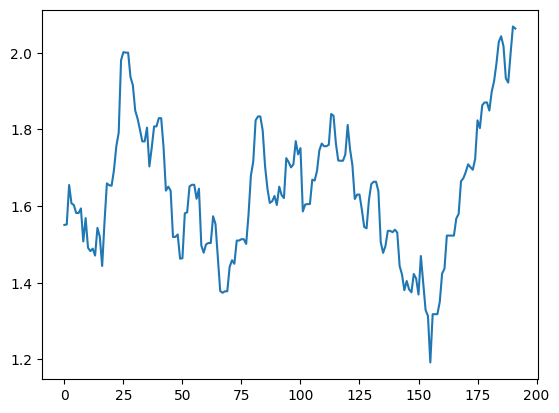

In [84]:
plt.plot(y_te[1,:,:])

In [178]:
sum_mse_tot = 0; sum_nll_tot = 0

idx_list = list(range(x_test.shape[0] - (n_C+n_T)))
num_batches = len(idx_list)//test_batch_s
t_te,y_te,idx_list = batcher(x_test, y_test, idx_list,batch_s = test_batch_s, window=n_C+n_T)
μ, log_σ = model([t_te, y_te, n_C, n_T, False])
_,_,_, nll_pp_te, msex_te = losses.nll(y_te[:, n_C:n_C+n_T], μ, log_σ)


In [179]:
nll_pp_te

<tf.Tensor: shape=(), dtype=float32, numpy=0.51009357>

In [180]:
msex_te

<tf.Tensor: shape=(), dtype=float32, numpy=0.0964899>

In [183]:
test_batch_s

126

In [185]:
y_mean = np.mean(y_te[:,:96],axis=1)

In [188]:
y_mean_repeat = np.repeat(y_mean[:,np.newaxis,:],axis=1,repeats=96)

In [192]:
np.mean((y_te[:,96:] - y_mean_repeat)**2)

0.15102154

In [73]:
test_batch_s = 100

sum_mse_tot = 0; sum_nll_tot = 0

idx_list = list(range(x_test.shape[0] - (n_C+n_T)))
num_batches = len(idx_list)//test_batch_s

for _ in range(num_batches): #### specify correct number of batches for the batcher #####
    if(_ == (num_batches-1)): test_batch_s = len(idx_list)        
    _,y_te,idx_list = batcher(x_test, y_test, idx_list,batch_s = test_batch_s, window=n_C+n_T)
    t_te = np.repeat(np.linspace(-1,1,(n_C+n_T))[np.newaxis,:,np.newaxis],axis=0,repeats=y_te.shape[0])
    μ, log_σ = model([t_te, y_te, n_C, n_T, False])
    _, sum_mse, sum_nll, _, _ = losses.nll(y_te[:, n_C:n_C+n_T], μ, log_σ)
    sum_nll_tot += sum_nll / n_T
    sum_mse_tot += sum_mse / n_T

nllx =  sum_nll_tot / (test_batch_s * x_test.shape[0]//test_batch_s)
msex =  sum_mse_tot / (test_batch_s * x_test.shape[0]//test_batch_s)

print(msex)

In [75]:
nllx

<tf.Tensor: shape=(), dtype=float32, numpy=22.302792>

In [85]:
msex

<tf.Tensor: shape=(), dtype=float32, numpy=0.090117544>

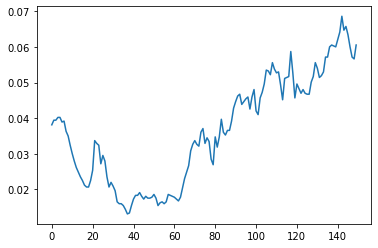

In [28]:
plt.plot(y_te[4])

In [29]:
idx_list = list(range(x_val.shape[0] - (n_C+n_T)))
t_te,y_te,_ = batcher(x_val,y_val,idx_list,batch_s = 100,window=n_C+n_T)
μ, log_σ = model([t_te, y_te, n_C, n_T, False])
_, sum_mse, sum_nll, _, _ = losses.nll(y_te[:, n_C:n_C+n_T], μ, log_σ)
print(sum_nll/n_T/100)

tf.Tensor(
[[18 32 14 24 30 37 29 22 28  8 45 39 20  0 43 46 31 17 16 19  5  6 26 44
  41 35 25 40 42 48  2 47 38 27 36  7 12  9 23 15 13 49 34  4 21  1 33 10
  11  3]], shape=(1, 50), dtype=int32)
tf.Tensor(False, shape=(), dtype=bool)
tf.Tensor(-1.5154082, shape=(), dtype=float32)


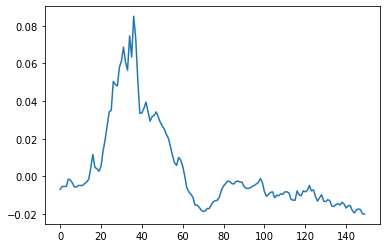

In [30]:
plt.plot(y_te[4])

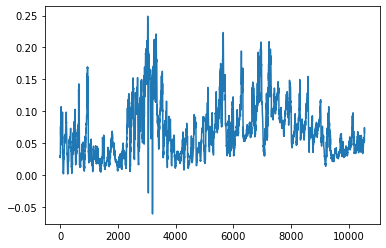

In [31]:
plt.plot(y_test[:,0,0])

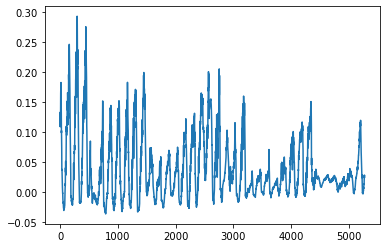

In [32]:
plt.plot(y_val[:,0,0])

In [33]:
sum_nll/n_T/100

<tf.Tensor: shape=(), dtype=float32, numpy=-1.5154082>

In [34]:
nllx

<tf.Tensor: shape=(), dtype=float32, numpy=-1.7052623>

In [35]:
msex

<tf.Tensor: shape=(), dtype=float32, numpy=0.0017760954>

In [8]:
array = np.load("weights/forecasting/exchange/tnp/ckpt/check_run_2/validation_losses_iteration.npy")

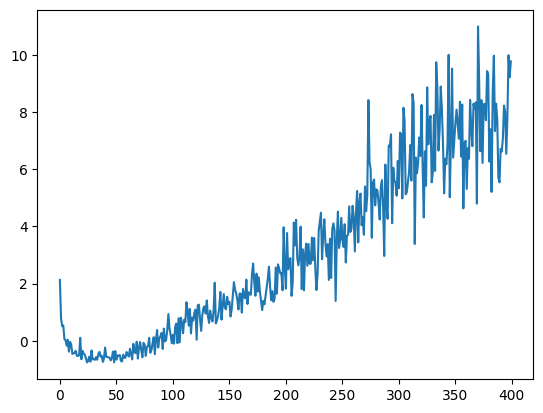

In [9]:
plt.plot(array)

In [10]:
np.min(array)

-0.7591304

-1.3101752

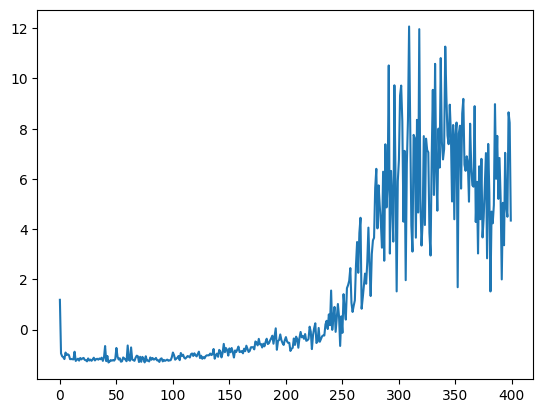

In [11]:
array = np.load("weights/forecasting/exchange/atp/ckpt/check_run_2/validation_losses_iteration.npy")
plt.plot(array)
np.min(array)

In [16]:
array = np.load("weights/forecasting/exchange/atp/nll_list.npy")
array
array.mean()

-1.2373469

In [17]:
array = np.load("weights/forecasting/exchange/tnp/nll_list.npy")
array
array.mean()

0.2742557

# atp

In [5]:
i = 0
step = 1
run= 50 + i
tf.random.set_seed(run)


Model 1

model = atp_pipeline.atp_pipeline(num_heads=6, projection_shape_for_head=8, output_shape=32, rate=0.1, permutation_repeats=0,
                 bound_std=False, num_layers=3, enc_dim=32, xmin=0.1, xmax=2)
                 
-1.3

Model 2

model = atp_pipeline.atp_pipeline(num_heads=7, projection_shape_for_head=15, output_shape=32, rate=0.1, permutation_repeats=0,
                 bound_std=False, num_layers=3, enc_dim=32, xmin=0.1, xmax=1)
                 
-1.35

Model 3

model = atp_pipeline.atp_pipeline(num_heads=6, projection_shape_for_head=12, output_shape=32, rate=0.0, permutation_repeats=0,
                 bound_std=False, num_layers=4, enc_dim=32, xmin=0.1, xmax=1)

-1.35

Model 4 

model = atp_pipeline.atp_pipeline(num_heads=6, projection_shape_for_head=9, output_shape=32, rate=0.0, permutation_repeats=0,
                 bound_std=False, num_layers=4, enc_dim=32, xmin=0.1, xmax=1,MHAX_leakage=False)
                 
-1.34

Model 5

model = atp_pipeline.atp_pipeline(num_heads=3, projection_shape_for_head=9, output_shape=32, rate=0.0, permutation_repeats=0,
                 bound_std=False, num_layers=6, enc_dim=32, xmin=0.1, xmax=1,MHAX_leakage=False)
                 
-1.35

Model 6 

model = atp_pipeline.atp_pipeline(num_heads=10, projection_shape_for_head=9, output_shape=32, rate=0.0, permutation_repeats=0,
                 bound_std=False, num_layers=6, enc_dim=32, xmin=0.1, xmax=1,MHAX_leakage="new_block")

-1.33

Model 7

-1.31

Model 8  

model = atp_pipeline.atp_pipeline(num_heads=8, projection_shape_for_head=12, output_shape=32, rate=0.0, permutation_repeats=0,
                 bound_std=False, num_layers=3, enc_dim=32, xmin=0.1, xmax=1,MHAX_leakage="xxx")

-1.34

In [6]:
# model = atp_pipeline.atp_pipeline(num_heads=8, projection_shape_for_head=12, output_shape=32, rate=0.0,
#                                   permutation_repeats=0,
#                  bound_std=False, num_layers=3, enc_dim=32, xmin=0.1, xmax=1,MHAX_leakage="xxx")



model = atp_pipeline.atp_pipeline(num_heads=10, projection_shape_for_head=9, output_shape=32, rate=0.05, permutation_repeats=0,
                 bound_std=False, num_layers=6, enc_dim=32, xmin=0.1, xmax=1,MHAX_leakage="new_block")

array = []
train_array = []

idx_list = list(range(x_train.shape[0] - (n_C+n_T)))
x,y,_ = batcher(x_train,y_train,idx_list,window=n_C+n_T)

μ, log_σ = model([x, y, n_C, n_T, False])


model.summary()

2023-05-09 15:13:03.255099: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-05-09 15:13:03.898567: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1613] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 5047 MB memory:  -> device: 0, name: Quadro P4000, pci bus id: 0000:3b:00.0, compute capability: 6.1


(32, 336, 432)
(32, 336)


2023-05-09 15:13:04.860045: I tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:428] Loaded cuDNN version 8401


Model: "atp_pipeline"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 feature_wrapper (feature_wr  multiple                 0         
 apper)                                                          
                                                                 
 atp (ATP)                   multiple                  88270     
                                                                 
 de (DE)                     multiple                  4         
                                                                 
Total params: 88,274
Trainable params: 88,272
Non-trainable params: 2
_________________________________________________________________


In [13]:

    run = 202
    tr_step = atp_graph.build_graph()

    ###### can we put the name of the model into the folder name #########?

    name_comp = 'run_' + str(run)
    folder = save_dir + '/ckpt/check_' + name_comp
    if not os.path.exists(folder): os.mkdir(folder)
    opt = tf.keras.optimizers.Adam(3e-4)
    ckpt = tf.train.Checkpoint(step=tf.Variable(1), optimizer=opt, net=model)
    manager = tf.train.CheckpointManager(ckpt, folder, max_to_keep=1)
    ckpt.restore(manager.latest_checkpoint) 
    sum_mse_tot = 0; sum_nll_tot = 0
    mini = 50000

In [16]:
y.shape

(8, 432, 1)

In [11]:
for i in range(2000):
    idx_list = list(range(x_train.shape[0] - (n_C+n_T)))
    _,y,_ = batcher(x_train,y_train,idx_list,window=n_C+n_T) ####### generalise for not just forecasting
    x = np.repeat(np.linspace(-1,1,(n_C+n_T))[np.newaxis,:,np.newaxis],axis=0,repeats=32)
    #### edit batcher to fix this
    _,_, nll_pp_tr, _ = tr_step(model, opt, x,y,n_C,n_T, training=True)

    if i % 100 == 0:
        train_array.append(nll_pp_tr)
        idx_list = list(range(x_val.shape[0] - (n_C+n_T)))
        _,y_te,_ = batcher(x_val,y_val,idx_list,batch_s = 100,window=n_C+n_T)
        t_te = np.repeat(np.linspace(-1,1,(n_C+n_T))[np.newaxis,:,np.newaxis],axis=0,repeats=100)
        μ, log_σ = model([t_te, y_te, n_C, n_T, False])
        _,_,_, nll_pp_te, msex_te = losses.nll(y_te[:, n_C:n_C+n_T], μ, log_σ)
        array.append(nll_pp_te)
        
        plt.plot(train_array)
        plt.plot(array)
        plt.show()

        print(nll_pp_te)
        print(min(array))

        if nll_pp_te < mini:
            mini = nll_pp_te
            manager.save()
            step += 1
            ckpt.step.assign_add(1)




2023-05-09 14:48:40.287147: W tensorflow/tsl/framework/bfc_allocator.cc:479] Allocator (GPU_0_bfc) ran out of memory trying to allocate 28.48MiB (rounded to 29859840)requested by op gradient_tape/atp_pipeline_1/atp_1/mha_b_3/multi_head_attention_new_block_4/dot_product_attention_10/LessEqual
If the cause is memory fragmentation maybe the environment variable 'TF_GPU_ALLOCATOR=cuda_malloc_async' will improve the situation. 
Current allocation summary follows.
Current allocation summary follows.
2023-05-09 14:48:40.287354: I tensorflow/tsl/framework/bfc_allocator.cc:1034] BFCAllocator dump for GPU_0_bfc
2023-05-09 14:48:40.287402: I tensorflow/tsl/framework/bfc_allocator.cc:1041] Bin (256): 	Total Chunks: 511, Chunks in use: 511. 127.8KiB allocated for chunks. 127.8KiB in use in bin. 54.1KiB client-requested in use in bin.
2023-05-09 14:48:40.287428: I tensorflow/tsl/framework/bfc_allocator.cc:1041] Bin (512): 	Total Chunks: 57, Chunks in use: 57. 29.2KiB allocated for chunks. 29.2KiB in

2023-05-09 14:48:50.307622: W tensorflow/tsl/framework/bfc_allocator.cc:479] Allocator (GPU_0_bfc) ran out of memory trying to allocate 2.37MiB (rounded to 2488320)requested by op atp_pipeline_1/atp_1/mha_b_3/multi_head_attention_new_block_4/dot_product_attention_10/MatMul_1
If the cause is memory fragmentation maybe the environment variable 'TF_GPU_ALLOCATOR=cuda_malloc_async' will improve the situation. 
Current allocation summary follows.
Current allocation summary follows.
2023-05-09 14:48:50.307740: I tensorflow/tsl/framework/bfc_allocator.cc:1034] BFCAllocator dump for GPU_0_bfc
2023-05-09 14:48:50.307772: I tensorflow/tsl/framework/bfc_allocator.cc:1041] Bin (256): 	Total Chunks: 511, Chunks in use: 511. 127.8KiB allocated for chunks. 127.8KiB in use in bin. 54.1KiB client-requested in use in bin.
2023-05-09 14:48:50.307796: I tensorflow/tsl/framework/bfc_allocator.cc:1041] Bin (512): 	Total Chunks: 57, Chunks in use: 57. 29.2KiB allocated for chunks. 29.2KiB in use in bin. 21.4

ResourceExhaustedError: Graph execution error:

Detected at node 'gradient_tape/atp_pipeline_1/atp_1/mha_b_3/multi_head_attention_new_block_4/dot_product_attention_10/LessEqual' defined at (most recent call last):
    File "/data/hpcdata/users/rapart57/conda-envs/updated_tf/lib/python3.10/runpy.py", line 196, in _run_module_as_main
      return _run_code(code, main_globals, None,
    File "/data/hpcdata/users/rapart57/conda-envs/updated_tf/lib/python3.10/runpy.py", line 86, in _run_code
      exec(code, run_globals)
    File "/data/hpcdata/users/rapart57/conda-envs/updated_tf/lib/python3.10/site-packages/ipykernel_launcher.py", line 17, in <module>
      app.launch_new_instance()
    File "/data/hpcdata/users/rapart57/conda-envs/updated_tf/lib/python3.10/site-packages/traitlets/config/application.py", line 1043, in launch_instance
      app.start()
    File "/data/hpcdata/users/rapart57/conda-envs/updated_tf/lib/python3.10/site-packages/ipykernel/kernelapp.py", line 712, in start
      self.io_loop.start()
    File "/data/hpcdata/users/rapart57/conda-envs/updated_tf/lib/python3.10/site-packages/tornado/platform/asyncio.py", line 215, in start
      self.asyncio_loop.run_forever()
    File "/data/hpcdata/users/rapart57/conda-envs/updated_tf/lib/python3.10/asyncio/base_events.py", line 603, in run_forever
      self._run_once()
    File "/data/hpcdata/users/rapart57/conda-envs/updated_tf/lib/python3.10/asyncio/base_events.py", line 1906, in _run_once
      handle._run()
    File "/data/hpcdata/users/rapart57/conda-envs/updated_tf/lib/python3.10/asyncio/events.py", line 80, in _run
      self._context.run(self._callback, *self._args)
    File "/data/hpcdata/users/rapart57/conda-envs/updated_tf/lib/python3.10/site-packages/ipykernel/kernelbase.py", line 510, in dispatch_queue
      await self.process_one()
    File "/data/hpcdata/users/rapart57/conda-envs/updated_tf/lib/python3.10/site-packages/ipykernel/kernelbase.py", line 499, in process_one
      await dispatch(*args)
    File "/data/hpcdata/users/rapart57/conda-envs/updated_tf/lib/python3.10/site-packages/ipykernel/kernelbase.py", line 406, in dispatch_shell
      await result
    File "/data/hpcdata/users/rapart57/conda-envs/updated_tf/lib/python3.10/site-packages/ipykernel/kernelbase.py", line 730, in execute_request
      reply_content = await reply_content
    File "/data/hpcdata/users/rapart57/conda-envs/updated_tf/lib/python3.10/site-packages/ipykernel/ipkernel.py", line 383, in do_execute
      res = shell.run_cell(
    File "/data/hpcdata/users/rapart57/conda-envs/updated_tf/lib/python3.10/site-packages/ipykernel/zmqshell.py", line 528, in run_cell
      return super().run_cell(*args, **kwargs)
    File "/data/hpcdata/users/rapart57/conda-envs/updated_tf/lib/python3.10/site-packages/IPython/core/interactiveshell.py", line 2881, in run_cell
      result = self._run_cell(
    File "/data/hpcdata/users/rapart57/conda-envs/updated_tf/lib/python3.10/site-packages/IPython/core/interactiveshell.py", line 2936, in _run_cell
      return runner(coro)
    File "/data/hpcdata/users/rapart57/conda-envs/updated_tf/lib/python3.10/site-packages/IPython/core/async_helpers.py", line 129, in _pseudo_sync_runner
      coro.send(None)
    File "/data/hpcdata/users/rapart57/conda-envs/updated_tf/lib/python3.10/site-packages/IPython/core/interactiveshell.py", line 3135, in run_cell_async
      has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
    File "/data/hpcdata/users/rapart57/conda-envs/updated_tf/lib/python3.10/site-packages/IPython/core/interactiveshell.py", line 3338, in run_ast_nodes
      if await self.run_code(code, result, async_=asy):
    File "/data/hpcdata/users/rapart57/conda-envs/updated_tf/lib/python3.10/site-packages/IPython/core/interactiveshell.py", line 3398, in run_code
      exec(code_obj, self.user_global_ns, self.user_ns)
    File "/tmp/ipykernel_49586/2777712364.py", line 6, in <cell line: 1>
      _,_, nll_pp_tr, _ = tr_step(model, opt, x,y,n_C,n_T, training=True)
    File "/data/hpcdata/users/rapart57/ATP/model/atp_graph.py", line 16, in train_step
      gradients = tape.gradient(likpp, atp_model.trainable_variables)
Node: 'gradient_tape/atp_pipeline_1/atp_1/mha_b_3/multi_head_attention_new_block_4/dot_product_attention_10/LessEqual'
failed to allocate memory
	 [[{{node gradient_tape/atp_pipeline_1/atp_1/mha_b_3/multi_head_attention_new_block_4/dot_product_attention_10/LessEqual}}]]
Hint: If you want to see a list of allocated tensors when OOM happens, add report_tensor_allocations_upon_oom to RunOptions for current allocation info. This isn't available when running in Eager mode.
 [Op:__inference_train_step_43986]

In [153]:
ckpt = tf.train.Checkpoint(step=tf.Variable(step), optimizer=opt, net=model)
manager = tf.train.CheckpointManager(ckpt, folder, max_to_keep=1)
ckpt.restore(manager.latest_checkpoint) 

In [154]:
test_batch_s = 100

sum_mse_tot = 0; sum_nll_tot = 0

idx_list = list(range(x_test.shape[0] - (n_C+n_T)))
num_batches = len(idx_list)//test_batch_s

for _ in range(num_batches): #### specify correct number of batches for the batcher #####
    if(_ == (num_batches-1)): test_batch_s = len(idx_list)        
    _,y_te,idx_list = batcher(x_test, y_test, idx_list,batch_s = test_batch_s, window=n_C+n_T)
    t_te = np.repeat(np.linspace(-1,1,(n_C+n_T))[np.newaxis,:,np.newaxis],axis=0,repeats=y_te.shape[0])
    μ, log_σ = model([t_te, y_te, n_C, n_T, False])
    _, sum_mse, sum_nll, _, _ = losses.nll(y_te[:, n_C:n_C+n_T], μ, log_σ)
    sum_nll_tot += sum_nll / n_T
    sum_mse_tot += sum_mse / n_T

nllx =  sum_nll_tot / (test_batch_s * x_test.shape[0]//test_batch_s)
msex =  sum_mse_tot / (test_batch_s * x_test.shape[0]//test_batch_s)

print(msex)

tf.Tensor(0.002536377, shape=(), dtype=float32)


## Gp

In [19]:
i = 0
step = 1
run= 50 + i
tf.random.set_seed(run)


In [20]:
n_C = 10
n_T = 40

Model 1 

model = atp_pipeline.atp_pipeline(num_heads=3, projection_shape_for_head=10, output_shape=32, rate=0.0, permutation_repeats=0,
                 bound_std=False, num_layers=6, enc_dim=32, xmin=0.1, xmax=1,MHAX_leakage=True)

-0.61

Model 2

model = atp_pipeline.atp_pipeline(num_heads=3, projection_shape_for_head=9, output_shape=32, rate=0.0, permutation_repeats=0,
                 bound_std=False, num_layers=5, enc_dim=32, xmin=0.1, xmax=1,MHAX_leakage=False)

-0.7

Model 3 

model = atp_pipeline.atp_pipeline(num_heads=10, projection_shape_for_head=9, output_shape=32, rate=0.0, permutation_repeats=0,
                 bound_std=False, num_layers=6, enc_dim=32, xmin=0.1, xmax=2,MHAX_leakage="new_block")
                 
-0.87

Model 4 

model = atp_pipeline.atp_pipeline(num_heads=8, projection_shape_for_head=12, output_shape=32, rate=0.0, permutation_repeats=0,
                 bound_std=False, num_layers=3, enc_dim=32, xmin=0.1, xmax=1,MHAX_leakage="xxx")

-1.0

In [30]:
model = atp_pipeline.atp_pipeline(num_heads=10, projection_shape_for_head=9, output_shape=32, rate=0.0, permutation_repeats=0,
                 bound_std=False, num_layers=6, enc_dim=32, xmin=0.1, xmax=2,MHAX_leakage="new_block")
            
array = []
train_array = []

idx_list = list(range(x_train.shape[0] - (n_C+n_T)))
x,y, = batcher_np(x_train,y_train)

μ, log_σ = model([x, y, n_C, n_T, False])


model.summary()

Model: "atp_pipeline_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 feature_wrapper_11 (feature  multiple                 0         
 _wrapper)                                                       
                                                                 
 atp_11 (ATP)                multiple                  88270     
                                                                 
 de_11 (DE)                  multiple                  4         
                                                                 
Total params: 88,274
Trainable params: 88,272
Non-trainable params: 2
_________________________________________________________________


In [31]:

    run = 5
    tr_step = atp_graph.build_graph()

    ###### can we put the name of the model into the folder name #########?

    name_comp = 'run_' + str(run)
    folder = save_dir + '/ckpt/check_' + name_comp
    if not os.path.exists(folder): os.mkdir(folder)
    opt = tf.keras.optimizers.Adam(3e-4)
    ckpt = tf.train.Checkpoint(step=tf.Variable(1), optimizer=opt, net=model)
    manager = tf.train.CheckpointManager(ckpt, folder, max_to_keep=1)
    ckpt.restore(manager.latest_checkpoint) 
    sum_mse_tot = 0; sum_nll_tot = 0
    mini = 50000

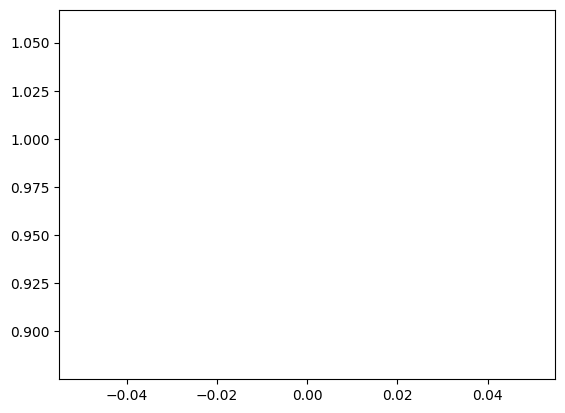

tf.Tensor(1.0583986, shape=(), dtype=float32)
tf.Tensor(1.0583986, shape=(), dtype=float32)


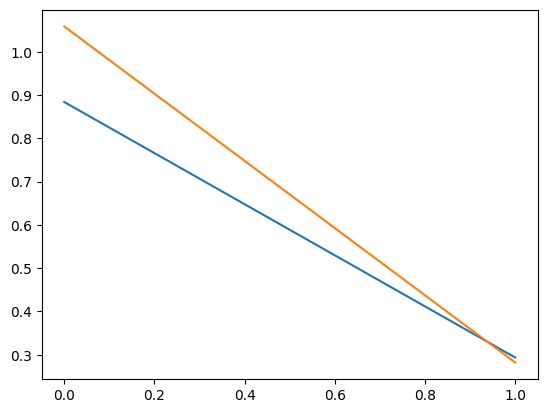

tf.Tensor(0.28214136, shape=(), dtype=float32)
tf.Tensor(0.28214136, shape=(), dtype=float32)


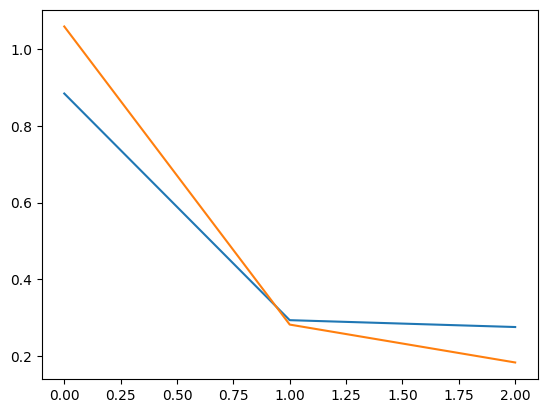

tf.Tensor(0.18346982, shape=(), dtype=float32)
tf.Tensor(0.18346982, shape=(), dtype=float32)


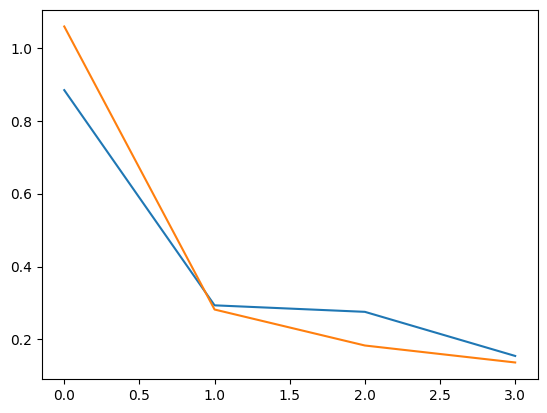

tf.Tensor(0.13691033, shape=(), dtype=float32)
tf.Tensor(0.13691033, shape=(), dtype=float32)


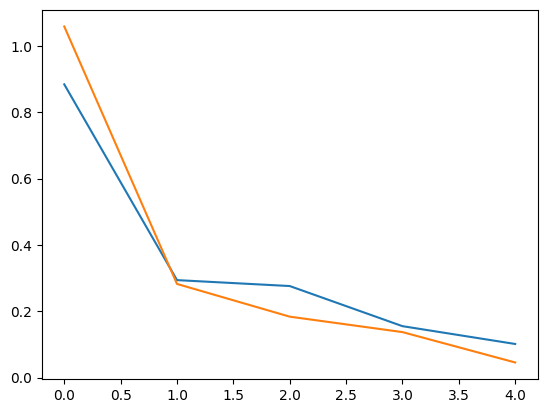

tf.Tensor(0.045313932, shape=(), dtype=float32)
tf.Tensor(0.045313932, shape=(), dtype=float32)


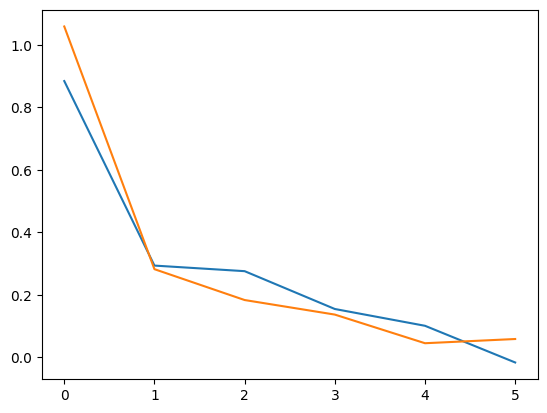

tf.Tensor(0.058775336, shape=(), dtype=float32)
tf.Tensor(0.045313932, shape=(), dtype=float32)


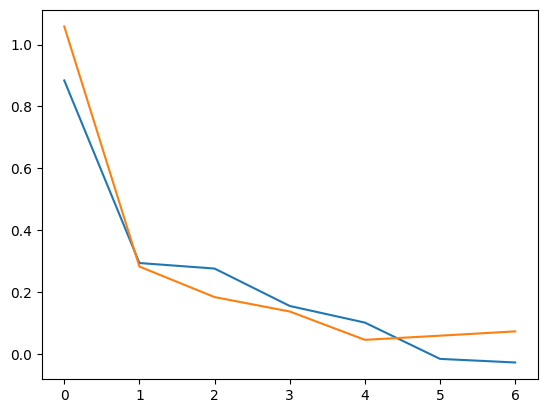

tf.Tensor(0.07267372, shape=(), dtype=float32)
tf.Tensor(0.045313932, shape=(), dtype=float32)


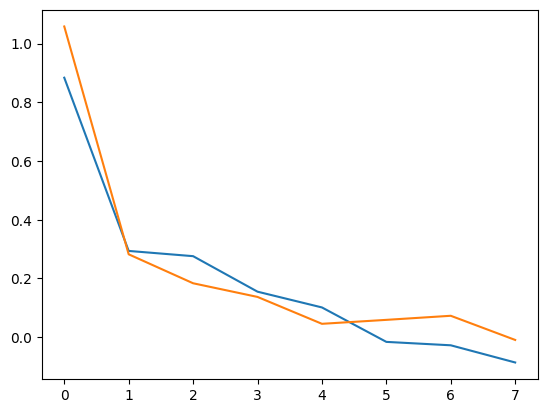

tf.Tensor(-0.009635075, shape=(), dtype=float32)
tf.Tensor(-0.009635075, shape=(), dtype=float32)


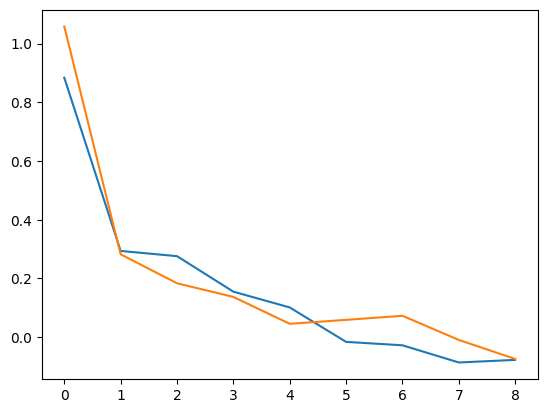

tf.Tensor(-0.07437568, shape=(), dtype=float32)
tf.Tensor(-0.07437568, shape=(), dtype=float32)


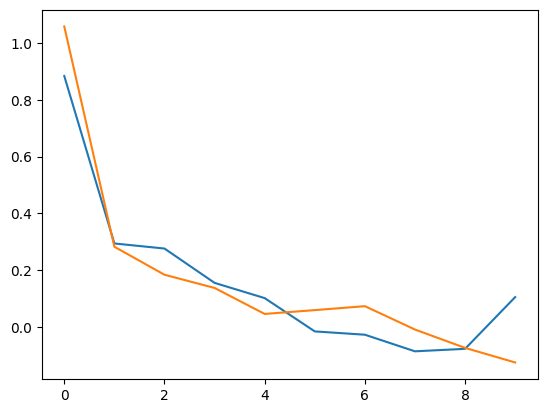

tf.Tensor(-0.1257593, shape=(), dtype=float32)
tf.Tensor(-0.1257593, shape=(), dtype=float32)


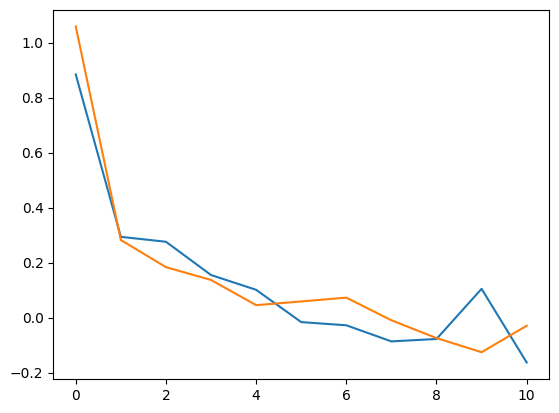

tf.Tensor(-0.029569378, shape=(), dtype=float32)
tf.Tensor(-0.1257593, shape=(), dtype=float32)


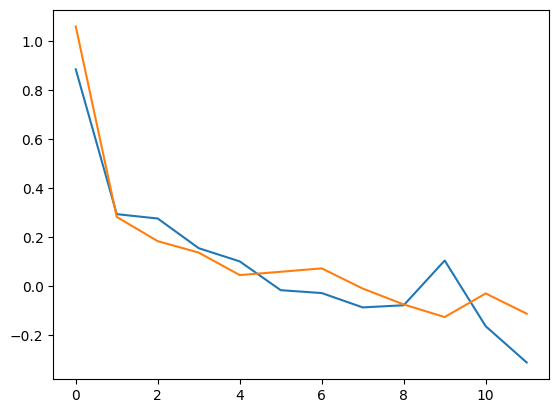

tf.Tensor(-0.11192569, shape=(), dtype=float32)
tf.Tensor(-0.1257593, shape=(), dtype=float32)


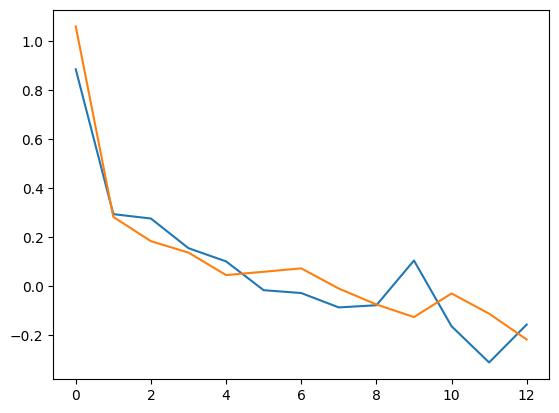

tf.Tensor(-0.2171941, shape=(), dtype=float32)
tf.Tensor(-0.2171941, shape=(), dtype=float32)


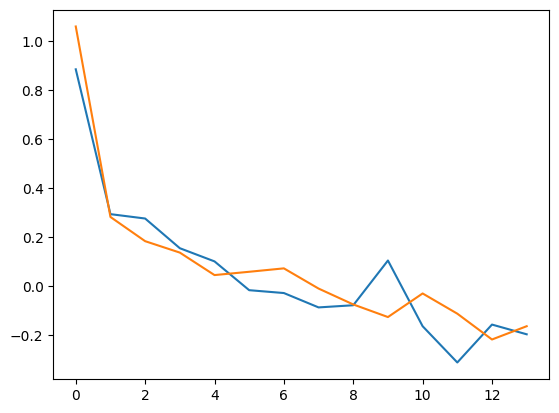

tf.Tensor(-0.16307974, shape=(), dtype=float32)
tf.Tensor(-0.2171941, shape=(), dtype=float32)


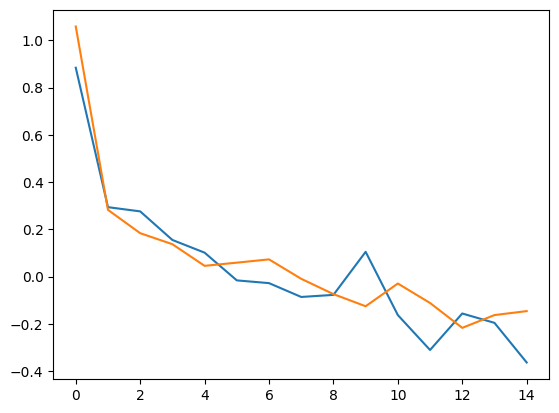

tf.Tensor(-0.14628626, shape=(), dtype=float32)
tf.Tensor(-0.2171941, shape=(), dtype=float32)


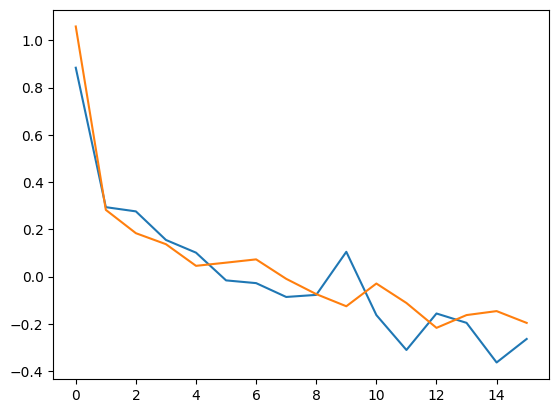

tf.Tensor(-0.19620717, shape=(), dtype=float32)
tf.Tensor(-0.2171941, shape=(), dtype=float32)


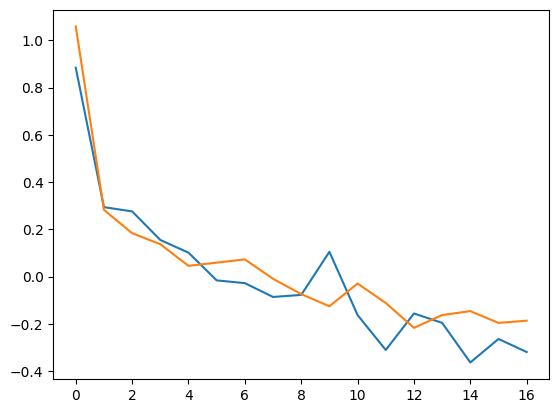

tf.Tensor(-0.1868781, shape=(), dtype=float32)
tf.Tensor(-0.2171941, shape=(), dtype=float32)


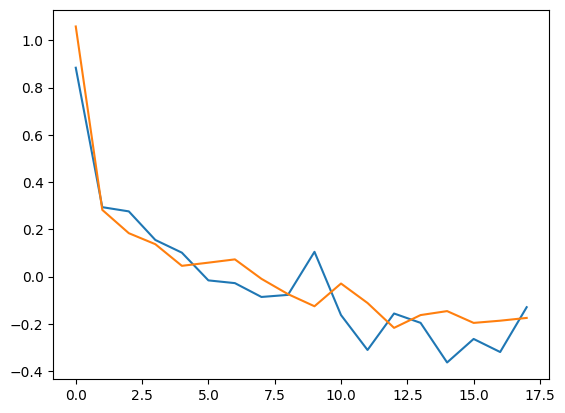

tf.Tensor(-0.17511813, shape=(), dtype=float32)
tf.Tensor(-0.2171941, shape=(), dtype=float32)


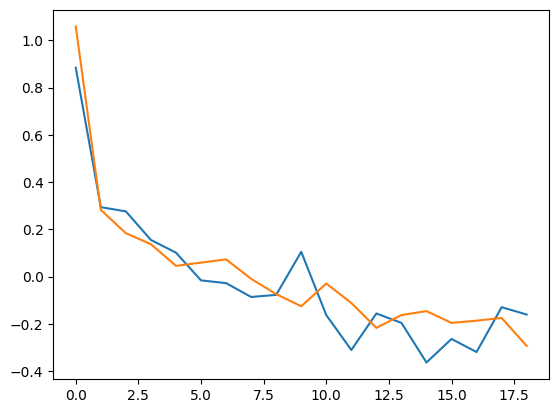

tf.Tensor(-0.29362413, shape=(), dtype=float32)
tf.Tensor(-0.29362413, shape=(), dtype=float32)


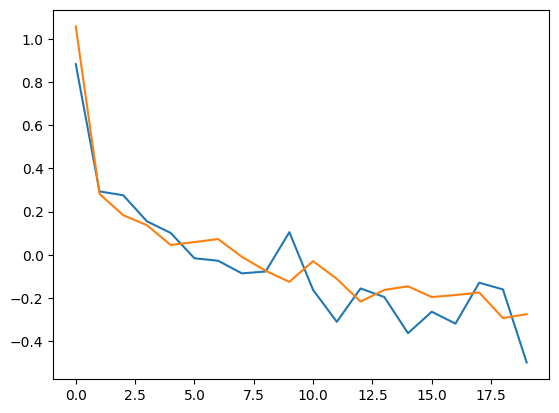

tf.Tensor(-0.2757826, shape=(), dtype=float32)
tf.Tensor(-0.29362413, shape=(), dtype=float32)


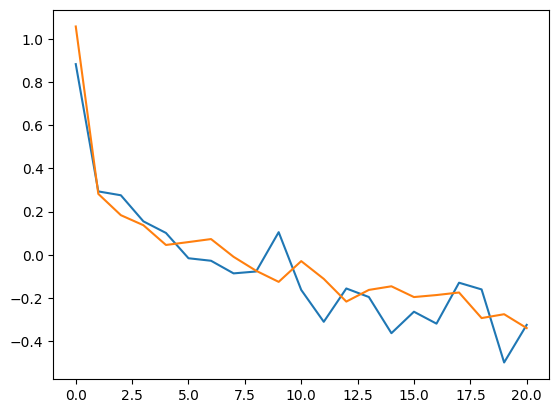

tf.Tensor(-0.33997342, shape=(), dtype=float32)
tf.Tensor(-0.33997342, shape=(), dtype=float32)


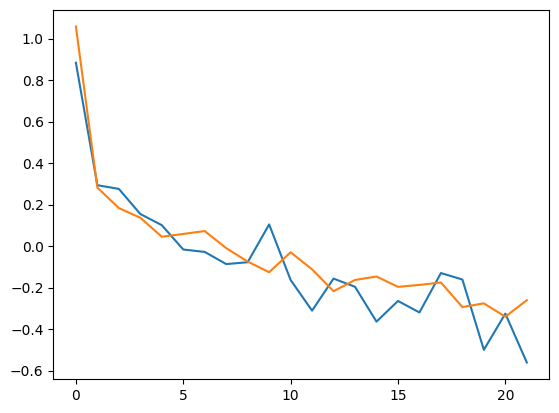

tf.Tensor(-0.2605058, shape=(), dtype=float32)
tf.Tensor(-0.33997342, shape=(), dtype=float32)


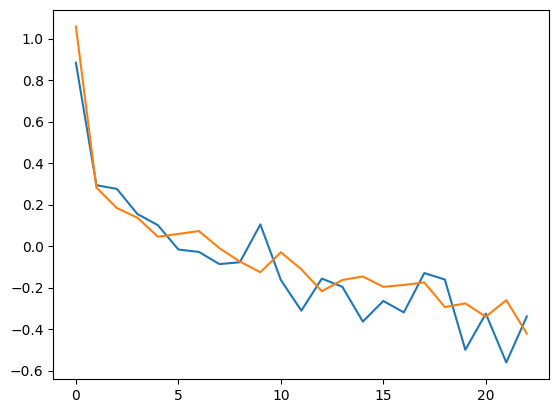

tf.Tensor(-0.42147905, shape=(), dtype=float32)
tf.Tensor(-0.42147905, shape=(), dtype=float32)


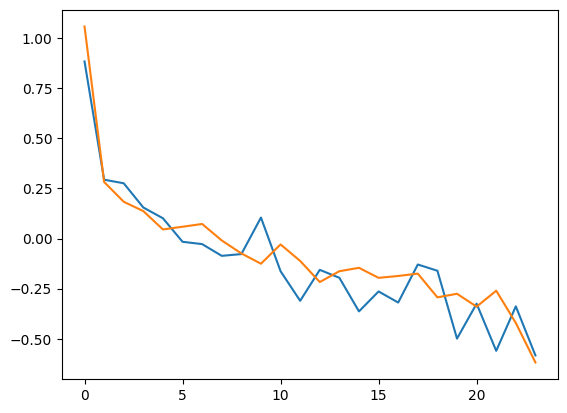

tf.Tensor(-0.6186853, shape=(), dtype=float32)
tf.Tensor(-0.6186853, shape=(), dtype=float32)


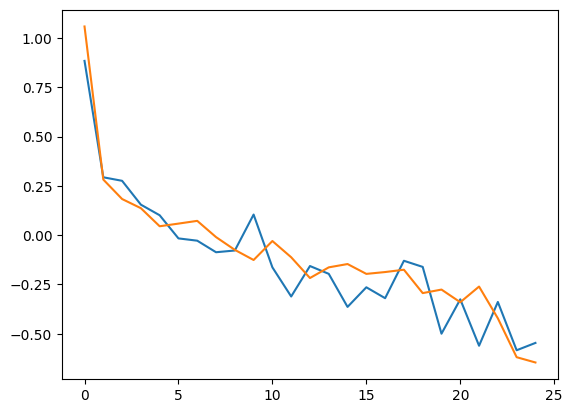

tf.Tensor(-0.64546996, shape=(), dtype=float32)
tf.Tensor(-0.64546996, shape=(), dtype=float32)


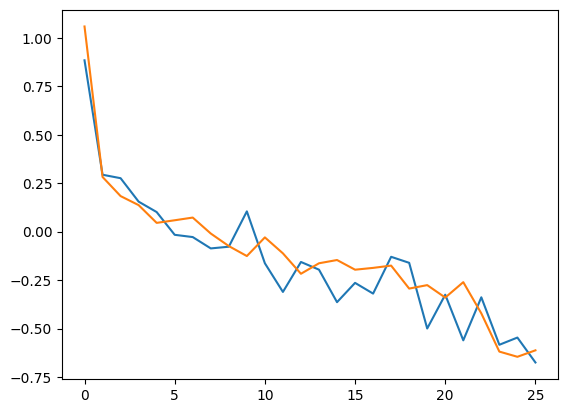

tf.Tensor(-0.61216676, shape=(), dtype=float32)
tf.Tensor(-0.64546996, shape=(), dtype=float32)


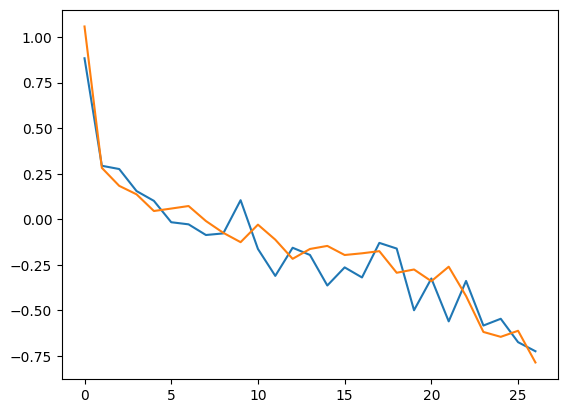

tf.Tensor(-0.7862427, shape=(), dtype=float32)
tf.Tensor(-0.7862427, shape=(), dtype=float32)


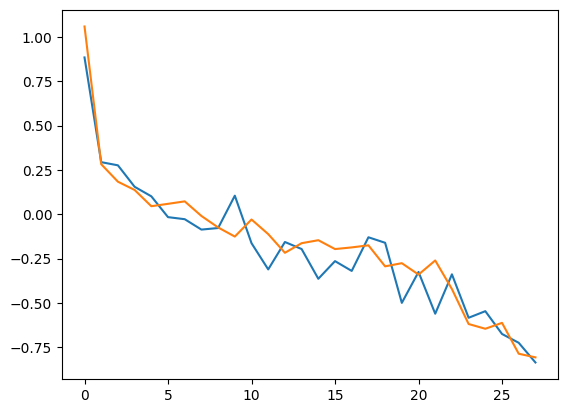

tf.Tensor(-0.8066315, shape=(), dtype=float32)
tf.Tensor(-0.8066315, shape=(), dtype=float32)


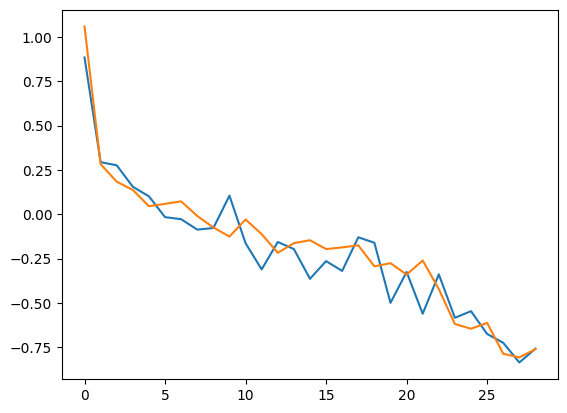

tf.Tensor(-0.76027673, shape=(), dtype=float32)
tf.Tensor(-0.8066315, shape=(), dtype=float32)


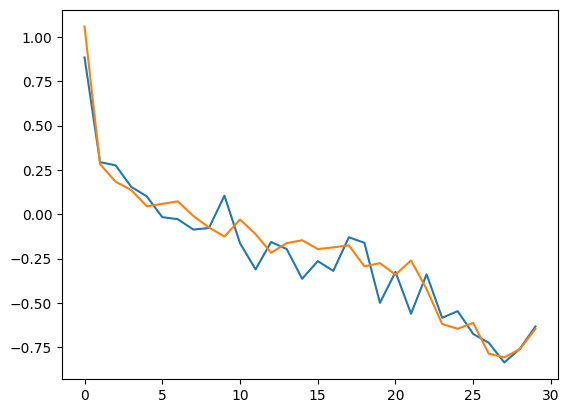

tf.Tensor(-0.6462792, shape=(), dtype=float32)
tf.Tensor(-0.8066315, shape=(), dtype=float32)


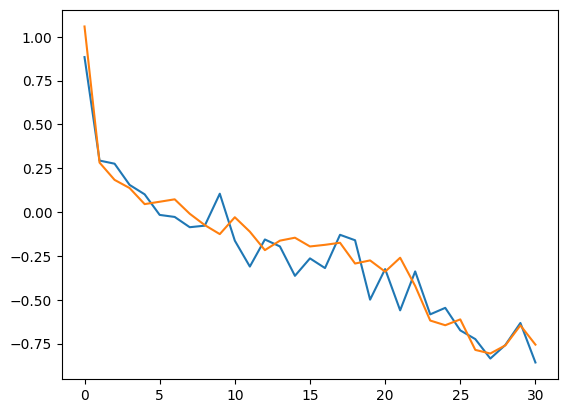

tf.Tensor(-0.75611365, shape=(), dtype=float32)
tf.Tensor(-0.8066315, shape=(), dtype=float32)


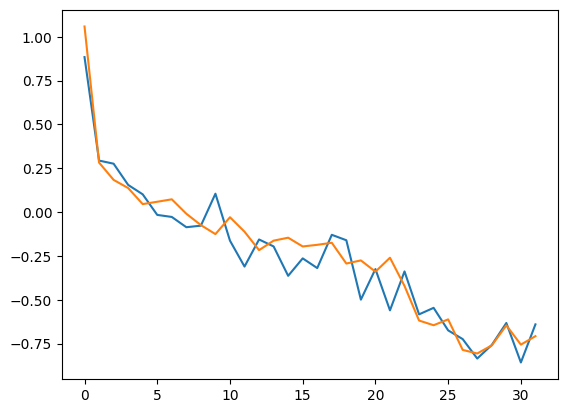

tf.Tensor(-0.70781684, shape=(), dtype=float32)
tf.Tensor(-0.8066315, shape=(), dtype=float32)


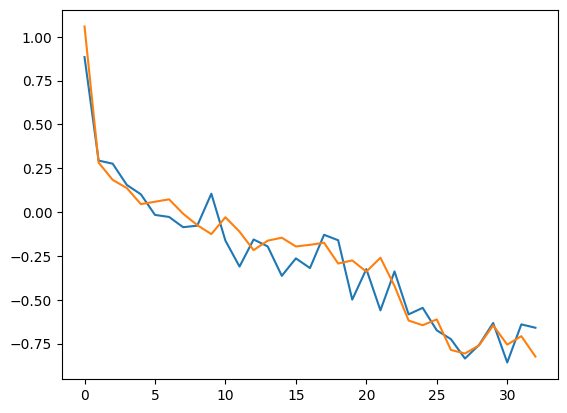

tf.Tensor(-0.8240133, shape=(), dtype=float32)
tf.Tensor(-0.8240133, shape=(), dtype=float32)


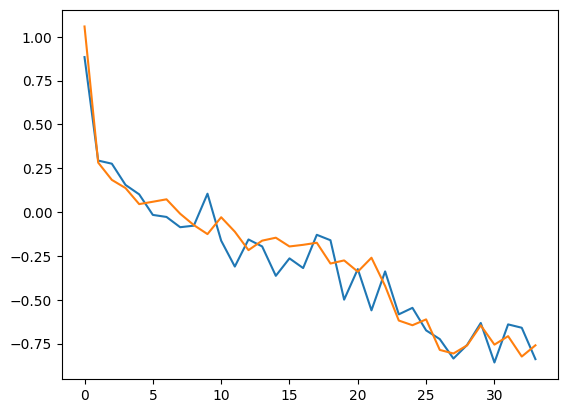

tf.Tensor(-0.75997025, shape=(), dtype=float32)
tf.Tensor(-0.8240133, shape=(), dtype=float32)


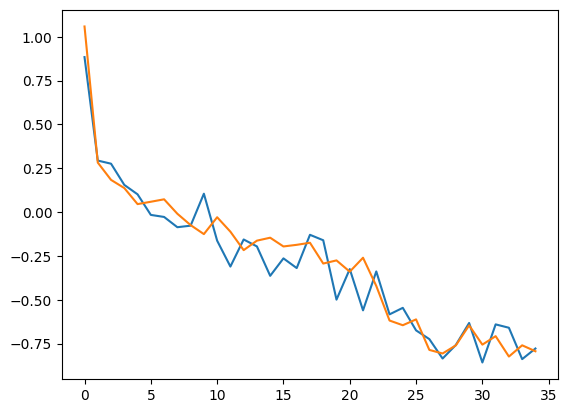

tf.Tensor(-0.7938692, shape=(), dtype=float32)
tf.Tensor(-0.8240133, shape=(), dtype=float32)


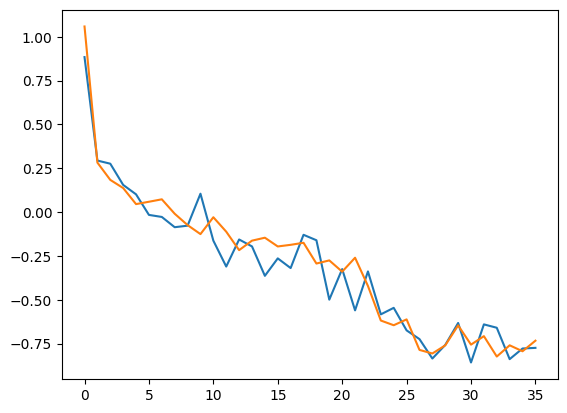

tf.Tensor(-0.73364246, shape=(), dtype=float32)
tf.Tensor(-0.8240133, shape=(), dtype=float32)


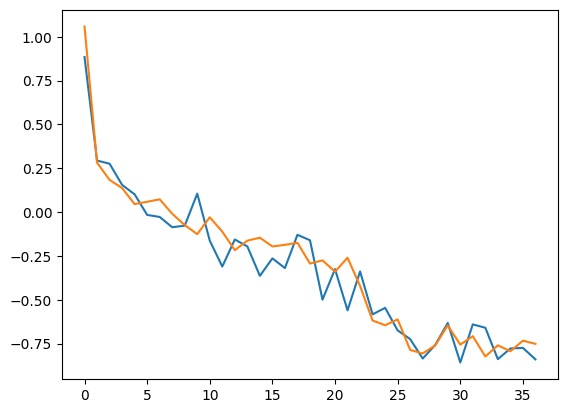

tf.Tensor(-0.7516913, shape=(), dtype=float32)
tf.Tensor(-0.8240133, shape=(), dtype=float32)


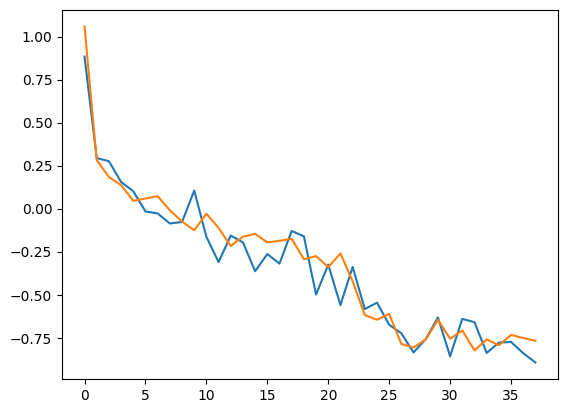

tf.Tensor(-0.76762605, shape=(), dtype=float32)
tf.Tensor(-0.8240133, shape=(), dtype=float32)


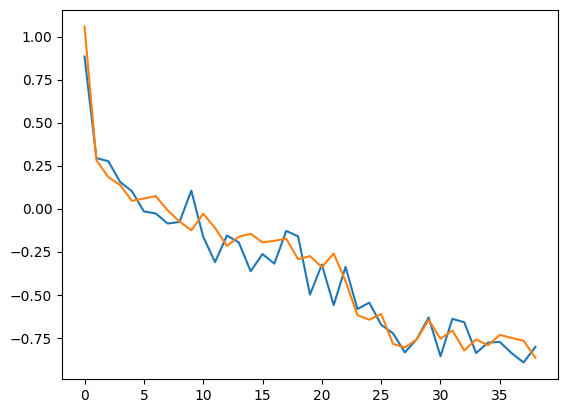

tf.Tensor(-0.8662021, shape=(), dtype=float32)
tf.Tensor(-0.8662021, shape=(), dtype=float32)


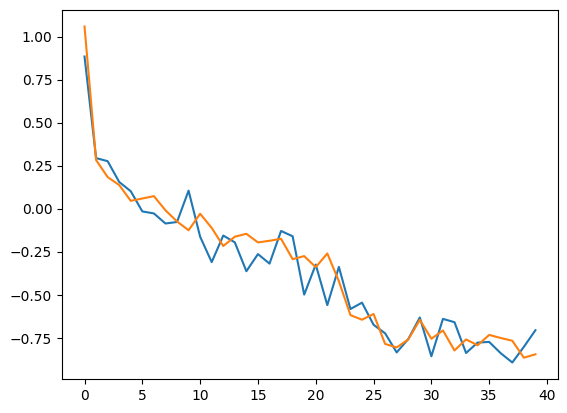

tf.Tensor(-0.8464695, shape=(), dtype=float32)
tf.Tensor(-0.8662021, shape=(), dtype=float32)


In [32]:
for i in range(4000):
    idx_list = list(range(x_train.shape[0] - (n_C+n_T)))
    x,y = batcher_np(x_train,y_train)
    _,_, nll_pp_tr, _ = tr_step(model, opt, x,y,n_C,n_T, training=True)

    if i % 100 == 0:
        train_array.append(nll_pp_tr)
        t_te,y_te = batcher_np(x_val,y_val,batch_s = 100)
        μ, log_σ = model([t_te, y_te, n_C, n_T, False])
        _,_,_, nll_pp_te, msex_te = losses.nll(y_te[:, n_C:n_C+n_T], μ, log_σ)
        array.append(nll_pp_te)
        
        plt.plot(train_array)
        plt.plot(array)
        plt.show()

        print(nll_pp_te)
        print(min(array))

        if nll_pp_te < mini:
            mini = nll_pp_te
            manager.save()
            step += 1
            ckpt.step.assign_add(1)


